In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
 url = 'Student_Performance.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.shape

(10000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
df.columns.values

array(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced',
       'Performance Index'], dtype=object)

In [8]:
 df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [9]:
df['Hours Studied'].max()

9

In [10]:
df.drop_duplicates()
df.shape

(10000, 6)

In [11]:
df['Extracurricular Activities'].value_counts()

No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64

In [12]:
for i in df.columns:
    print(df[i].value_counts())

1    1152
6    1133
7    1129
3    1119
9    1115
5    1094
8    1088
4    1085
2    1085
Name: Hours Studied, dtype: int64
54    216
87    208
56    192
62    184
89    182
60    181
53    181
77    181
52    176
58    176
57    176
49    175
66    175
65    175
84    175
91    175
97    174
79    174
40    173
83    173
75    172
70    172
93    172
47    172
92    172
90    172
42    171
44    170
48    170
95    169
41    169
67    168
43    167
73    166
61    165
78    165
88    164
59    163
63    163
46    163
86    162
81    161
71    159
99    159
85    159
96    159
98    158
45    154
69    153
80    153
68    153
82    148
94    148
72    148
64    147
55    144
74    143
76    142
51    140
50    123
Name: Previous Scores, dtype: int64
No     5052
Yes    4948
Name: Extracurricular Activities, dtype: int64
8    1804
7    1676
6    1673
9    1622
4    1619
5    1606
Name: Sleep Hours, dtype: int64
6    1059
9    1051
3    1035
5    1028
8    1026
7     987
1     978
4     9

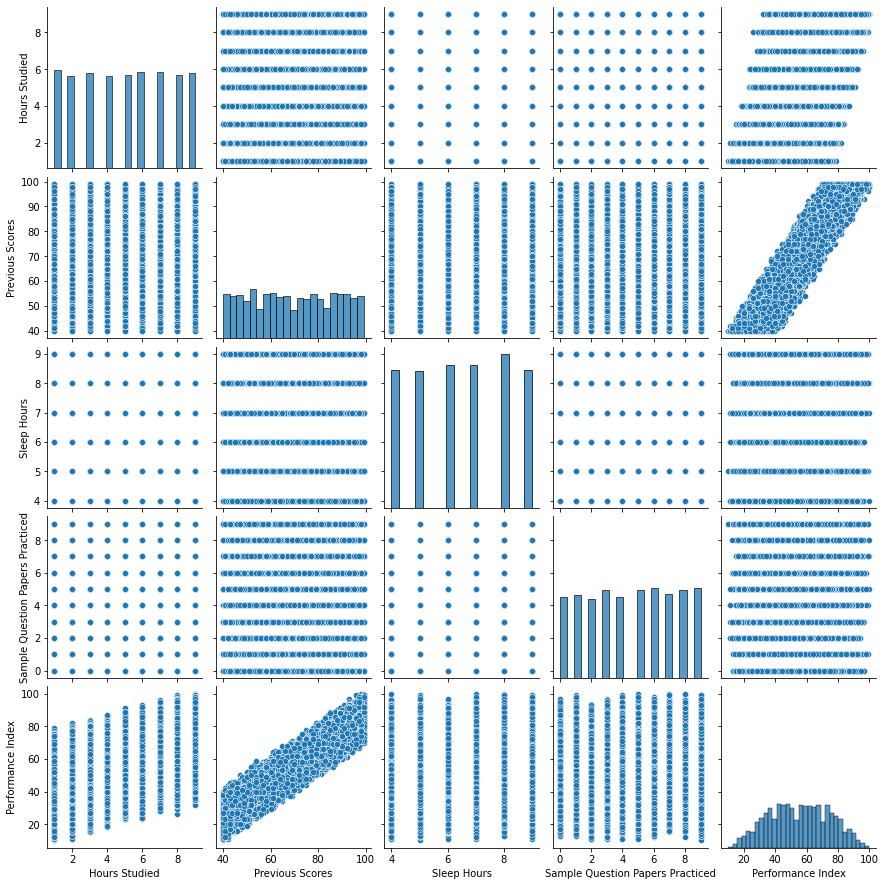

In [13]:
sns.pairplot(df)

<AxesSubplot:>

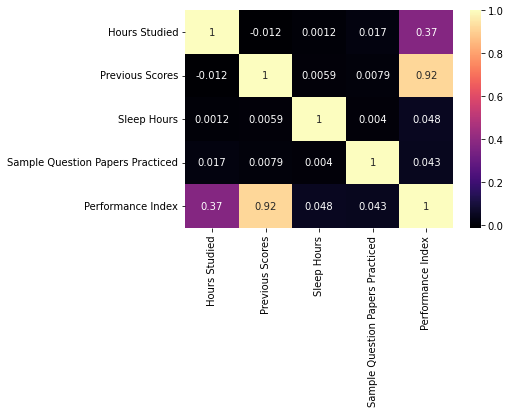

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='magma')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sleep Hours'>

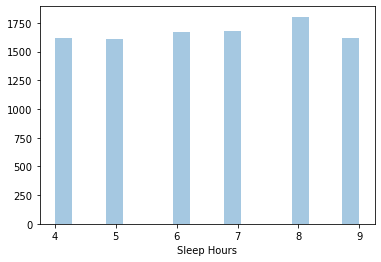

In [15]:
sns.distplot(df['Sleep Hours'], kde=False)

<AxesSubplot:xlabel='Hours Studied'>

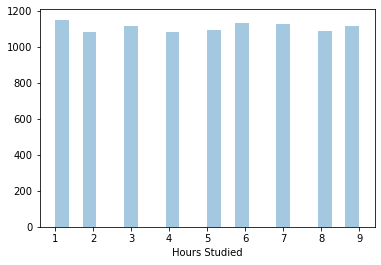

In [16]:
sns.distplot(df['Hours Studied'], kde=False)

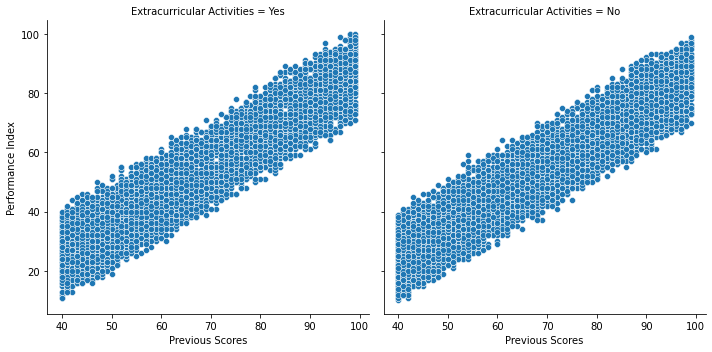

In [17]:
g = sns.relplot(data=df, x="Previous Scores", y="Performance Index", col="Extracurricular Activities")
g.set_axis_labels("Previous Scores", "Performance Index")

## Linear regression models


In [18]:
y = df['Performance Index']
X = df.drop('Performance Index', axis=1)

In [19]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [25]:
encoder = OneHotEncoder(sparse=False, drop='first')

encoded_data = encoder.fit_transform(X[['Extracurricular Activities']])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Extracurricular Activities']))

X = pd.concat([X, encoded_df], axis=1).drop('Extracurricular Activities', axis=1)

In [26]:
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1.0
1,4,82,4,2,0.0
2,8,51,7,2,1.0
3,5,52,5,2,1.0
4,7,75,8,5,0.0
...,...,...,...,...,...
9995,1,49,4,2,1.0
9996,7,64,8,5,1.0
9997,6,83,8,5,1.0
9998,9,97,7,0,1.0


In [45]:
 X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9254,5,49,7,5,0.0
1561,2,48,7,6,1.0
1670,2,81,7,2,0.0
6087,2,46,6,1,0.0
6669,8,47,9,0,0.0
...,...,...,...,...,...
5734,8,50,6,6,1.0
5191,4,68,9,3,0.0
5390,9,48,7,6,0.0
860,1,47,9,0,0.0


## Fitting Linear Regression on all columns

In [46]:
regression = linear_model.LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [47]:
#making predictions
performance_preds = regression.predict(X_test)

In [48]:
# The coefficients
print("Coefficients: \n", regression.coef_)

Coefficients: 
 [2.85248393 1.0169882  0.47694148 0.19183144 0.60861668]


In [49]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, performance_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, performance_preds))

Mean squared error: 4.08
Coefficient of determination: 0.99


In [50]:
X_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
9254,5,49,7,5,0.0
1561,2,48,7,6,1.0
1670,2,81,7,2,0.0
6087,2,46,6,1,0.0
6669,8,47,9,0,0.0
...,...,...,...,...,...
5734,8,50,6,6,1.0
5191,4,68,9,3,0.0
5390,9,48,7,6,0.0
860,1,47,9,0,0.0


### The model has an MSE of 4.08 which is a good error considering the values of the target variable. The r2 score is 0.99 which is almost perfect. The model is predicting well.